In [1]:
import numpy as np
import pandas as pd
import xarray as xr

from salishsea_tools import places

%matplotlib inline

In [2]:
atmos   = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')
(iY, iX) = places.PLACES['Sand Heads']['wind grid ji'] 

In [3]:
u_wind2015 = atmos.u_wind.sel(time ='2015', gridX=iX, gridY=iY, method='nearest')
v_wind2015 = atmos.v_wind.sel(time ='2015', gridX=iX, gridY=iY, method='nearest')
u_wind2016 = atmos.u_wind.sel(time ='2016', gridX=iX, gridY=iY, method='nearest')
v_wind2016 = atmos.v_wind.sel(time ='2016', gridX=iX, gridY=iY, method='nearest')
u_wind2017 = atmos.u_wind.sel(time ='2017', gridX=iX, gridY=iY, method='nearest')
v_wind2017 = atmos.v_wind.sel(time ='2017', gridX=iX, gridY=iY, method='nearest')
u_wind2018 = atmos.u_wind.sel(time ='2018', gridX=iX, gridY=iY, method='nearest')
v_wind2018 = atmos.v_wind.sel(time ='2018', gridX=iX, gridY=iY, method='nearest')

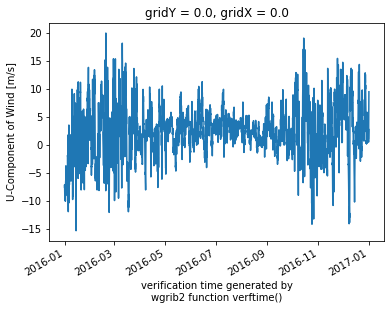

In [4]:
u_wind2016.plot()

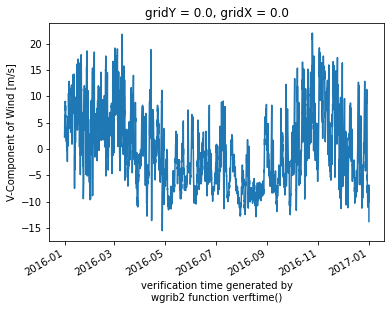

In [5]:
v_wind2016.plot()

In [7]:
along_strait2015 = np.cos(np.deg2rad(29))*v_wind2015 + np.sin(np.deg2rad(29))*u_wind2015
along_strait2016 = np.cos(np.deg2rad(29))*v_wind2016 + np.sin(np.deg2rad(29))*u_wind2016
along_strait2017 = np.cos(np.deg2rad(29))*v_wind2017 + np.sin(np.deg2rad(29))*u_wind2017
along_strait2018 = np.cos(np.deg2rad(29))*v_wind2018 + np.sin(np.deg2rad(29))*u_wind2018

In [8]:
along_strait = xr.concat([along_strait2015, along_strait2016, along_strait2017, along_strait2018], dim='time')
day_avg_wind = along_strait.resample(time='1D').mean()
day_avg_wind_pd = day_avg_wind.to_dataframe(name='wind')
day_avg_wind_pd = day_avg_wind_pd.drop('gridY', 1)
day_avg_wind_pd = day_avg_wind_pd.drop('gridX', 1)

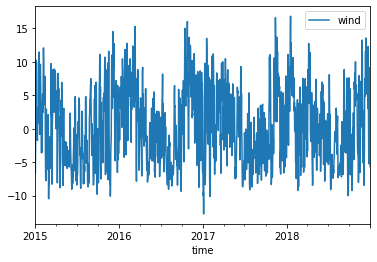

In [9]:
day_avg_wind_pd.plot();

In [10]:
day_avg_wind_pd.to_csv('day_avg_wind.csv')